ADVANCED BLUR DETECTION SYSTEM
Loading image...
Error: Could not load image from 'images/input.jpg'
Creating demo images instead...
Image loaded successfully! Shape: (400, 600, 3)
----------------------------------------------------------------------
TEST 1: Original Image
----------------------------------------------------------------------
SHARP (Score: 32567.79, Threshold: 100)
----------------------------------------------------------------------
TEST 2: Blurred Versions
----------------------------------------------------------------------
Slight Blur (Kernel: 3x3):
  SHARP (Score: 669.06, Threshold: 100)
Medium Blur (Kernel: 7x7):
  BLURRED (Score: 48.82, Threshold: 100)
Heavy Blur (Kernel: 15x15):
  BLURRED (Score: 6.72, Threshold: 100)
----------------------------------------------------------------------
TEST 3: Different Detection Methods
----------------------------------------------------------------------
LAPLACIAN Method:
  BLURRED (Score: 17.98, Threshold: 100)
GRADIENT

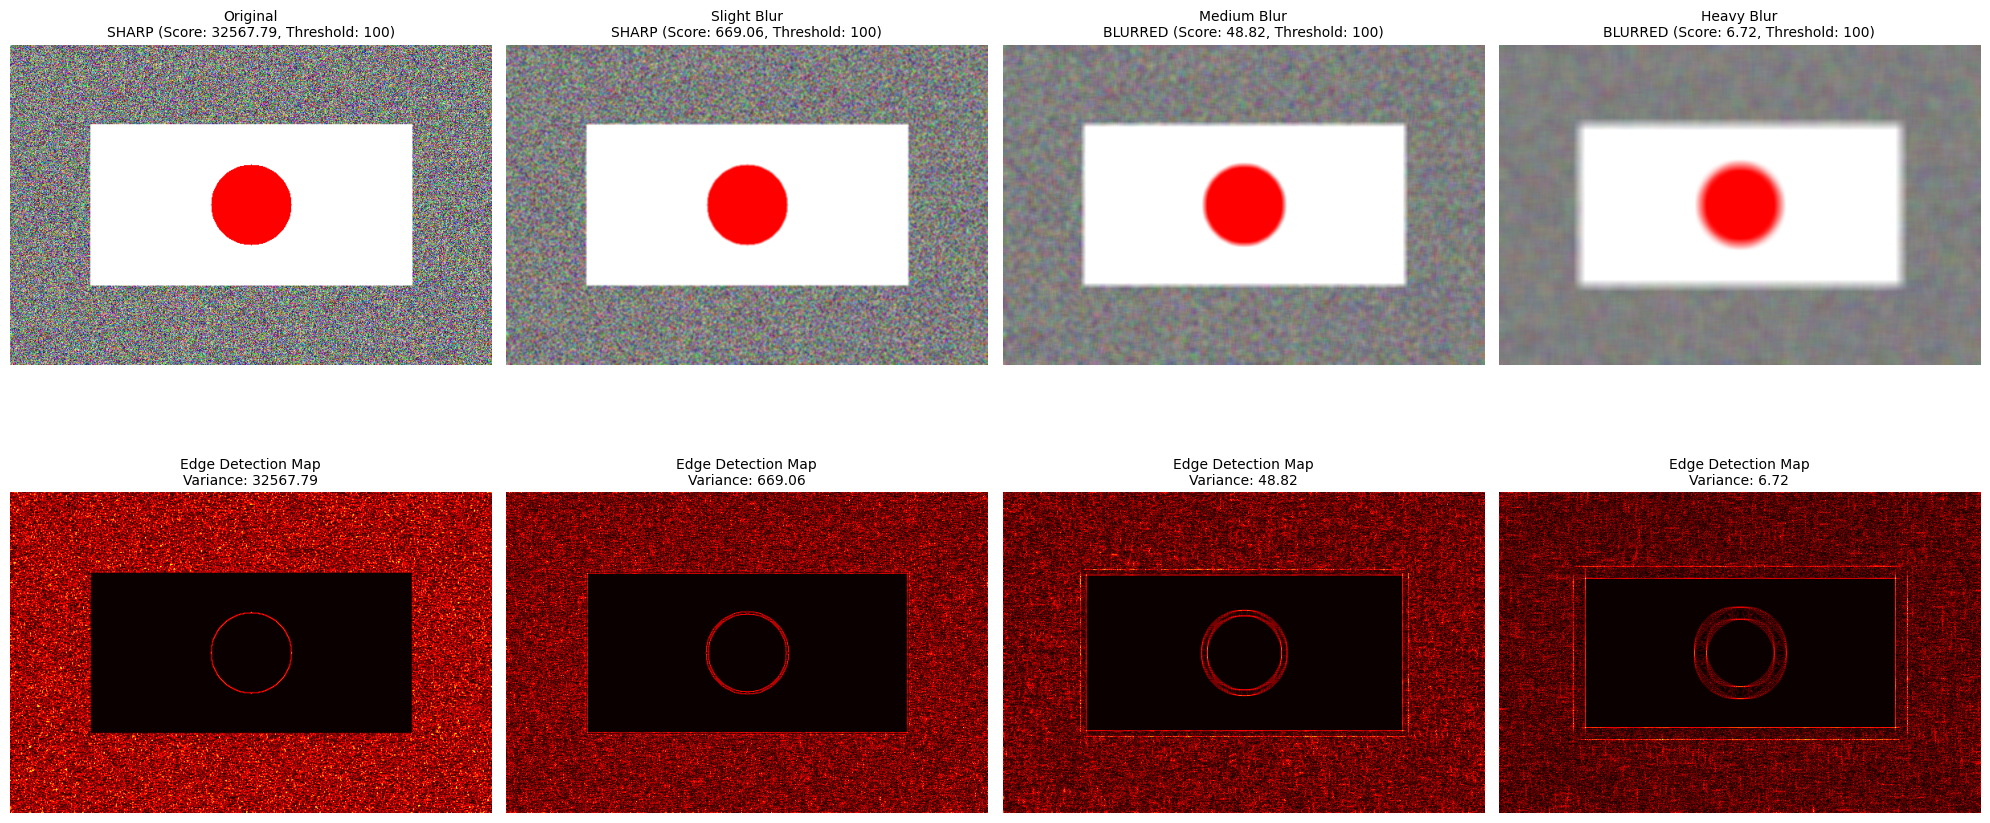

----------------------------------------------------------------------
RECOMMENDED THRESHOLDS
----------------------------------------------------------------------

    Image Type          | Threshold | Description
    --------------------|-----------|---------------------------
    High Quality Photos | 150-300   | Professional photography
    Standard Photos     | 100-150   | Regular camera photos
    Low Quality Images  | 50-100    | Webcam, compressed images
    Very Blurred        | < 50      | Heavily degraded images
    
    Note: Adjust threshold based on your specific use case
    
ANALYSIS COMPLETE!


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

class BlurDetector:
    """
    Advanced blur detection using Laplacian variance method
    """
    
    def __init__(self, threshold=100):
        """
        Initialize blur detector
        
        Args:
            threshold: Variance threshold for blur detection (default: 100)
                      Lower values = more strict blur detection
                      Higher values = more lenient
        """
        self.threshold = threshold
    
    def detect_blur(self, image, method='laplacian'):
        """
        Detect if an image is blurred
        
        Args:
            image: Input image (BGR format)
            method: Detection method ('laplacian', 'fft', 'gradient')
        
        Returns:
            tuple: (is_blurred, variance_score, status_message)
        """
        if image is None:
            return None, 0, "Error: Invalid image"
        
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        if method == 'laplacian':
            score = self._laplacian_variance(gray)
        elif method == 'fft':
            score = self._fft_blur_detection(gray)
        elif method == 'gradient':
            score = self._gradient_variance(gray)
        else:
            score = self._laplacian_variance(gray)
        
        is_blurred = score < self.threshold
        
        if is_blurred:
            status = f"BLURRED (Score: {score:.2f}, Threshold: {self.threshold})"
        else:
            status = f"SHARP (Score: {score:.2f}, Threshold: {self.threshold})"
        
        return is_blurred, score, status
    
    def _laplacian_variance(self, gray_image):
        """Calculate variance of Laplacian"""
        laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
        variance = laplacian.var()
        return variance
    
    def _gradient_variance(self, gray_image):
        """Calculate variance using Sobel gradients"""
        # Calculate gradients in x and y directions
        grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
        
        # Calculate magnitude
        gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
        variance = gradient_magnitude.var()
        
        return variance
    
    def _fft_blur_detection(self, gray_image):
        """
        FFT-based blur detection
        (Frequency domain analysis - blurred images have less high-frequency content)
        """
        # Compute FFT
        f_transform = np.fft.fft2(gray_image)
        f_shift = np.fft.fftshift(f_transform)
        magnitude_spectrum = np.abs(f_shift)
        
        # Calculate mean of high frequencies
        h, w = gray_image.shape
        center_h, center_w = h // 2, w // 2
        
        # Define high frequency region (outer 40% of spectrum)
        mask = np.ones((h, w), dtype=bool)
        radius = int(0.3 * min(center_h, center_w))
        y, x = np.ogrid[:h, :w]
        mask_area = (x - center_w)**2 + (y - center_h)**2 <= radius**2
        mask[mask_area] = False
        
        high_freq_mean = magnitude_spectrum[mask].mean()
        
        return high_freq_mean / 1000  # Normalize for comparable threshold
    
    def visualize_results(self, images_data):
        """
        Visualize multiple images with blur detection results
        
        Args:
            images_data: List of tuples (image, title)
        """
        n_images = len(images_data)
        fig, axes = plt.subplots(2, n_images, figsize=(5*n_images, 10))
        
        if n_images == 1:
            axes = axes.reshape(2, 1)
        
        for idx, (image, title) in enumerate(images_data):
            is_blurred, score, status = self.detect_blur(image)
            
            # Original image
            axes[0, idx].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axes[0, idx].set_title(f"{title}\n{status}", fontsize=10)
            axes[0, idx].axis('off')
            
            # Laplacian visualization
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            laplacian = cv2.Laplacian(gray, cv2.CV_64F)
            laplacian_abs = np.absolute(laplacian)
            laplacian_normalized = (laplacian_abs / laplacian_abs.max() * 255).astype(np.uint8)
            
            axes[1, idx].imshow(laplacian_normalized, cmap='hot')
            axes[1, idx].set_title(f"Edge Detection Map\nVariance: {score:.2f}", fontsize=10)
            axes[1, idx].axis('off')
        
        plt.tight_layout()
        plt.savefig('blur_detection_results.png', dpi=150, bbox_inches='tight')
        print("Visualization saved as 'blur_detection_results.png'")
        plt.show()
    
    def batch_process(self, image_paths):
        """
        Process multiple images and return results
        
        Args:
            image_paths: List of image file paths
        
        Returns:
            List of dictionaries with results
        """
        results = []
        
        for path in image_paths:
            img = cv2.imread(str(path))
            if img is None:
                print(f"Warning: Could not load {path}")
                continue
            
            is_blurred, score, status = self.detect_blur(img)
            
            results.append({
                'path': path,
                'is_blurred': is_blurred,
                'score': score,
                'status': status
            })
        
        return results


def main():
    """
    Main function demonstrating blur detection
    """
    print("=" * 70)
    print("ADVANCED BLUR DETECTION SYSTEM")
    print("=" * 70)
    
    # Initialize detector with threshold
    detector = BlurDetector(threshold=100)
    
    # Example 1: Load and check original image
    print("Loading image...")
    img_path = 'images/input.jpg'
    
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Error: Could not load image from '{img_path}'")
        print("Creating demo images instead...")
        
        # Create sample images for demonstration
        img = np.random.randint(0, 255, (400, 600, 3), dtype=np.uint8)
        # Add some structure to make it look like an image
        cv2.rectangle(img, (100, 100), (500, 300), (255, 255, 255), -1)
        cv2.circle(img, (300, 200), 50, (0, 0, 255), -1)
    
    print(f"Image loaded successfully! Shape: {img.shape}")
    
    # Example 2: Test original image
    print("-" * 70)
    print("TEST 1: Original Image")
    print("-" * 70)
    is_blurred, score, status = detector.detect_blur(img)
    print(status)
    
    # Example 3: Create and test blurred versions
    print("-" * 70)
    print("TEST 2: Blurred Versions")
    print("-" * 70)
    
    blur_levels = [
        (3, "Slight Blur"),
        (7, "Medium Blur"),
        (15, "Heavy Blur")
    ]
    
    images_for_viz = [(img, "Original")]
    
    for kernel_size, label in blur_levels:
        blurred = cv2.blur(img, (kernel_size, kernel_size))
        is_blurred, score, status = detector.detect_blur(blurred)
        print(f"{label} (Kernel: {kernel_size}x{kernel_size}):")
        print(f"  {status}")
        images_for_viz.append((blurred, label))
    
    # Example 4: Compare different detection methods
    print("-" * 70)
    print("TEST 3: Different Detection Methods")
    print("-" * 70)
    
    test_img = cv2.blur(img, (10, 10))
    methods = ['laplacian', 'gradient', 'fft']
    
    for method in methods:
        is_blurred, score, status = detector.detect_blur(test_img, method=method)
        print(f"{method.upper()} Method:")
        print(f"  {status}")
    
    # Example 5: Visualize results
    print("-" * 70)
    print("Generating Visualization...")
    print("-" * 70)
    detector.visualize_results(images_for_viz)
    
    # Example 6: Recommended thresholds
    print("-" * 70)
    print("RECOMMENDED THRESHOLDS")
    print("-" * 70)
    print("""
    Image Type          | Threshold | Description
    --------------------|-----------|---------------------------
    High Quality Photos | 150-300   | Professional photography
    Standard Photos     | 100-150   | Regular camera photos
    Low Quality Images  | 50-100    | Webcam, compressed images
    Very Blurred        | < 50      | Heavily degraded images
    
    Note: Adjust threshold based on your specific use case
    """)
    
    print("=" * 70)
    print("ANALYSIS COMPLETE!")
    print("=" * 70)


# Example usage for different scenarios
def example_webcam_blur_detection():
    """
    Real-time blur detection from webcam
    """
    detector = BlurDetector(threshold=100)
    cap = cv2.VideoCapture(0)
    
    print("Starting webcam blur detection...")
    print("Press 'q' to quit")
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        is_blurred, score, status = detector.detect_blur(frame)
        
        # Display status on frame
        color = (0, 0, 255) if is_blurred else (0, 255, 0)
        cv2.putText(frame, status, (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
        
        cv2.imshow('Blur Detection', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    main()
    
    # Uncomment to test webcam detection
    # example_webcam_blur_detection()